# Packages Needed:

In [2]:
from astropy.io import fits
import astropy.io
import numpy as np
import matplotlib
from astropy.table import Table
import astropy.io
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats import fit_bivariate_normal
from astroML.stats.random import bivariate_normal
import numpy as np
import pandas as pd

## Loading the data

Filename: /Users/johnzhang/Desktop/MSDS_MASTERS/Capstone-NRAO/work/test_4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     864   (640, 640, 1, 1)   float32   


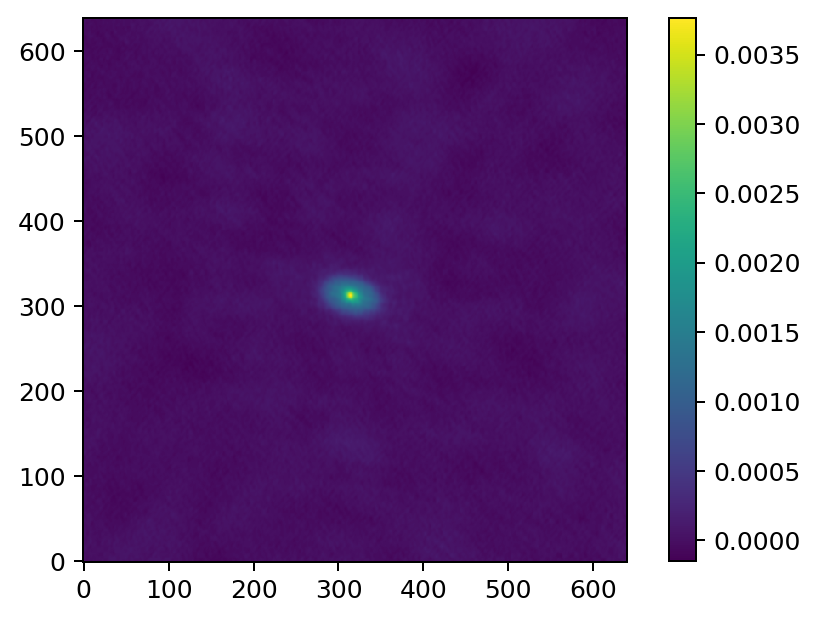

In [3]:
fits1 = fits.open('/Users/johnzhang/Desktop/MSDS_MASTERS/Capstone-NRAO/work/test_4.fits')
fits1.info()
image = fits1[0]

matplotlib.rcParams['figure.dpi'] = 180
plt.imshow(image.data[0,0,:,:], origin='lower')
plt.colorbar()

## Fitting the 5 parameters

In [4]:
X = range(len(image.data[0,0,:,:][0])) #X Axis (Coordinates)
Y = range(len(image.data[0,0,:,:]))    #Y Axis (Coordinates)
Z = image.data[0,0,:,:]                #Z Intensity of photos
Z = np.nan_to_num(Z,  0)               #Convert nan values to 0, if image has literal blank spots.
Z[Z<0.0002] = 0                        # noise in figure, we can set to 0.
X, Y = np.meshgrid(X, Y)               #Mesh grid
pos = np.dstack((X, Y))                #Position

In [5]:
x1_bar = np.average(X, weights=Z)      #Weighted X
x2_bar = np.average(Y, weights=Z)      #Weighted Y
x1_var = np.average((X-x1_bar)**2, weights=Z)  #Weighted X variance
x2_var = np.average((Y-x2_bar)**2, weights=Z)  #Weighted Y variance
x_cov = np.average(X*Y, weights=Z)-x1_bar*x2_bar #Covariance 

In [6]:
cov_mat = np.array([[x1_var, x_cov],[x_cov, x2_var]]) #Covariance matrix

### Plotting the Bivariate Gaussian from the parameters that we just derived

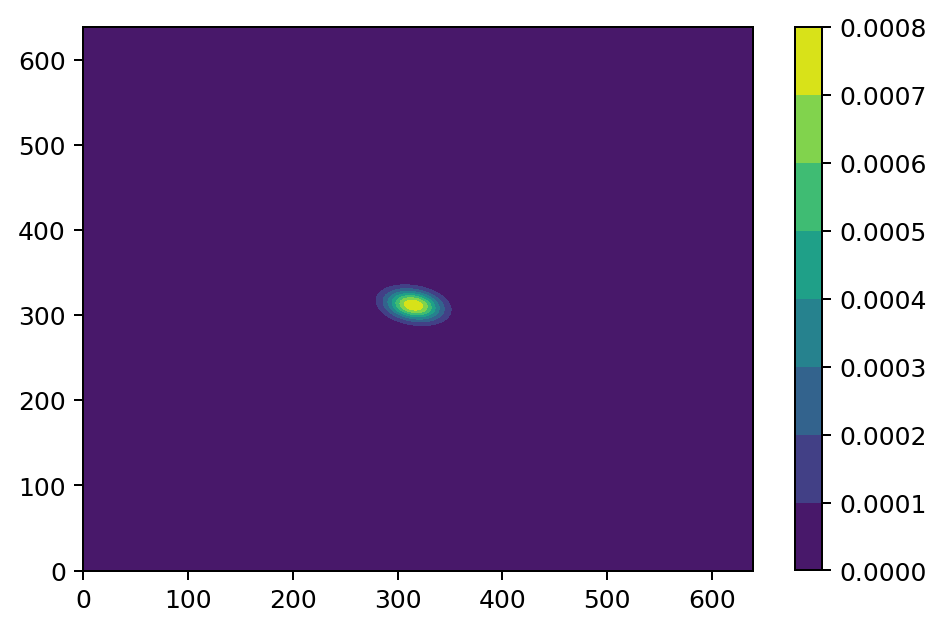

In [7]:
rv = stats.multivariate_normal([x1_bar, x2_bar], cov_mat)
plt.contourf(X, Y, rv.pdf(pos))
plt.colorbar()

### Preliminary function to fit our data

In [8]:
def bivariate_fit(X,Y,Z):
    X = range(len(image.data[0,0,:,:][0])) #X Axis (Coordinates)
    Y = range(len(image.data[0,0,:,:]))    #Y Axis (Coordinates)
    Z = image.data[0,0,:,:]                #Z Intensity of photos
    Z = np.nan_to_num(Z,  0) 
    Z[Z<0.0002] = 0  # noise in figure
    X, Y = np.meshgrid(X, Y)               #Mesh grid
    pos = np.dstack((X, Y))
    x1_bar = np.average(X, weights=Z)      #Weighted X
    x2_bar = np.average(Y, weights=Z)      #Weighted Y
    x1_var = np.average((X-x1_bar)**2, weights=Z)  #Weighted X variance
    x2_var = np.average((Y-x2_bar)**2, weights=Z)  #Weighted Y variance
    x_cov = np.average(X*Y, weights=Z)-x1_bar*x2_bar #Covariance 

    cov_mat = np.array([[x1_var, x_cov],[x_cov, x2_var]]) #Covariance matrix
    rv = stats.multivariate_normal([x1_bar, x2_bar], cov_mat) #Fitting a new Gaussian Normal with our parameters.
    plt.contourf(X, Y, rv.pdf(pos))                            #Plot
    plt.colorbar()


### TEST

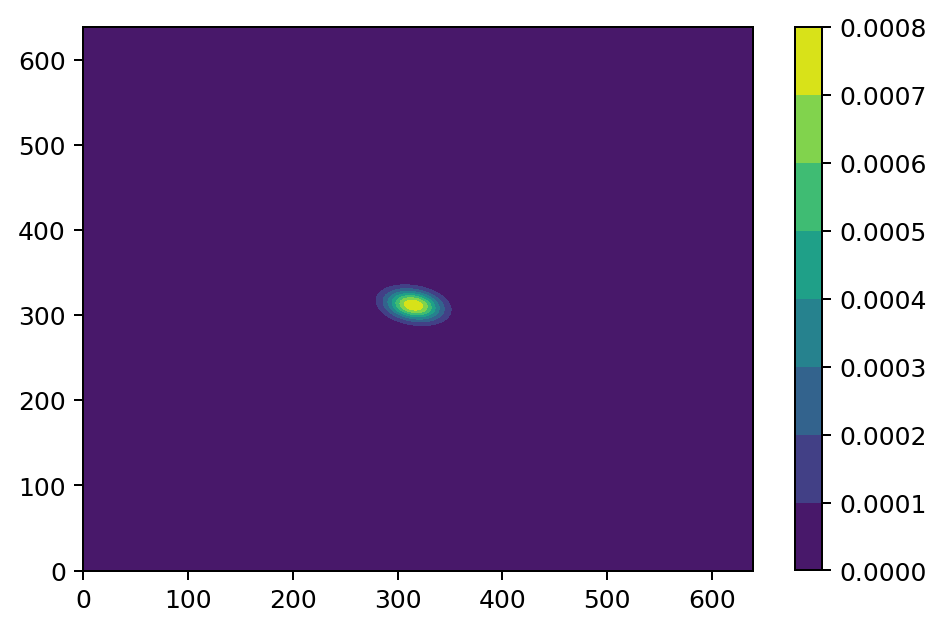

In [9]:
bivariate_fit(X,Y,Z)


In [17]:
R = rv.pdf(pos)
R[R<0.0005] = 0
Z.nonzero()[0].shape

(4001,)